## **FUZZY LOGIC CONTROLLER FOR WASHING MACHINE**

In [1]:
!pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 13.0 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=89489de4ae1f671a9db0fc83653461aa26fc71772bd9bbb0c328dc8e3e959fab
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [3]:
#DESCRIPTORS FOR INPUT - DIRT AND GREASE
grease = ctrl.Antecedent(np.arange(0, 100, 1), 'grease')
dirt = ctrl.Antecedent(np.arange(0, 100, 1), 'dirt')

In [4]:
#DESCRIPTORS FOR OUTPUT - TIME
time = ctrl.Consequent(np.arange(0, 100, 1), 'washing time')

**MEMBERSHIP FUNCTION FOR GREASE**

In [5]:
grease['small'] = fuzz.trimf(grease.universe, [0, 0, 50])
grease['average'] = fuzz.trimf(grease.universe, [0, 50, 100])
grease['big'] = fuzz.trimf(grease.universe, [50, 100, 100])

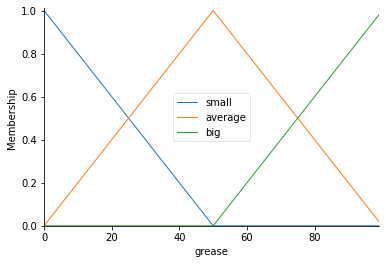

In [6]:
grease.view()

**MEMBERSHIP FUNCTION FOR DIRT**

In [7]:
dirt['small'] = fuzz.trimf(dirt.universe, [0, 0, 50])
dirt['average'] = fuzz.trimf(dirt.universe, [0, 50, 100])
dirt['big'] = fuzz.trimf(dirt.universe, [50, 100, 100])

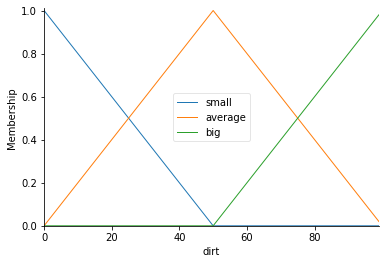

In [8]:
dirt.view()

**MEMBERSHIP FUNCTION FOR TIME**

In [9]:
time['Too Short'] = fuzz.trimf(time.universe, [0, 0, 25])
time['Short'] = fuzz.trimf(time.universe, [0, 25, 50])
time['Medium'] = fuzz.trimf(time.universe, [25, 50, 75])
time['Long'] = fuzz.trimf(time.universe, [50, 75, 100])
time['Too Long'] = fuzz.trimf(time.universe, [75, 100, 100])

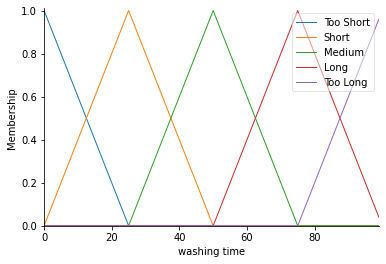

In [10]:
time.view()

```

DIRT   = SD | AD | BD
GREASE = SG | AG | BG
TIME   = TS | S | M | L | TL

```

**RULE BASE**

```
   | SD | AD | BD |
SG | TS | S  | M  |
AG | S  | M  | L  |
BG | M  | L  | TL |
```

In [11]:
rule1 = ctrl.Rule(dirt['small'] & grease['small'], time['Too Short'])
rule2 = ctrl.Rule(dirt['average'] & grease['small'], time['Short'])
rule3 = ctrl.Rule(dirt['big'] & grease['small'], time['Medium'])

rule4 = ctrl.Rule(dirt['small'] & grease['average'], time['Short'])
rule5 = ctrl.Rule(dirt['average'] & grease['average'], time['Medium'])
rule6 = ctrl.Rule(dirt['big'] & grease['average'], time['Long'])

rule7 = ctrl.Rule(dirt['small'] & grease['big'], time['Medium'])
rule8 = ctrl.Rule(dirt['average'] & grease['big'], time['Long'])
rule9 = ctrl.Rule(dirt['big'] & grease['big'], time['Too Long'])

**CREATING CONTROL SYSTEM**

In [12]:
rules = ctrl.ControlSystem([rule1, rule2, rule3, 
                            rule4, rule5, rule6, 
                            rule7, rule8, rule9])

In [13]:
FLC = ctrl.ControlSystemSimulation(rules)

**WORKING**


WASHING TIME = 63.38606608478802



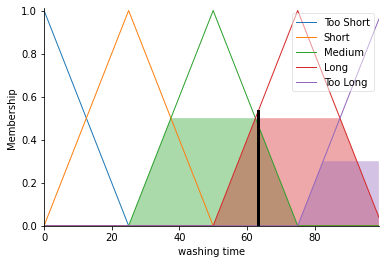

In [14]:
FLC.input['dirt'] = 65
FLC.input['grease'] = 75

FLC.compute()
print(f"\nWASHING TIME = {FLC.output['washing time']}\n")
time.view(sim = FLC)


WASHING TIME = 73.57205240174666



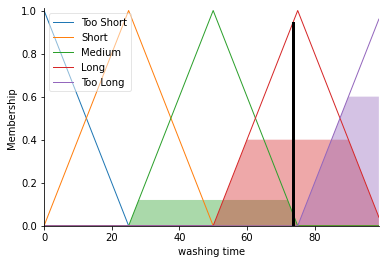

In [15]:
FLC.input['dirt'] = 94
FLC.input['grease'] = 80

FLC.compute()
print(f"\nWASHING TIME = {FLC.output['washing time']}\n")
time.view(sim = FLC)